# Convolutional Neural Networks

## Project: 犬の識別アプリのアルゴリズムを書く

---

このノートブックでは、いくつかのテンプレートコードがすでに提供されていますが、このプロジェクトを成功させるためには、追加の機能を実装する必要があります。付属のコードを要求された以上に修正する必要はありません。ヘッダーの**'(実装)'**で始まるセクションは、次のコードブロックが、あなたが提供しなければならない追加機能を必要とすることを示しています。各セクションには指示があり、具体的な実装内容はコードブロック内に「TODO」の記述で示されます。必ず指示をよく読んでください。



---
### なぜここにいるのか 

このノートでは、モバイルやウェブアプリの一部として使用できるアルゴリズムを開発するための最初の一歩を踏み出していただきます。 このプロジェクトの最終段階では、あなたのコードはユーザーが提供した任意の画像を入力として受け入れます。 画像の中に犬が検出された場合は、犬の品種の推定値を提供します。 また、人間が検出された場合は、最も似ている犬種の推定値を提供します。 以下の画像は、完成したプロジェクトの出力例です（...しかし、生徒のアルゴリズムはそれぞれ異なる動作をすることが予想されます）。

![Sample Dog Output](images/sample_dog_output.png)

例えば、画像の中の人間を検出するアルゴリズムと、犬の品種を推定するCNNは異なります。 例えば、画像から人間を検出するアルゴリズムと、犬の品種を推定するCNNは異なります。 不完全なソリューションであっても、楽しいユーザーエクスペリエンスを生み出すことができるのです。

### The Road Ahead

ここでは、ノートブックをいくつかのステップに分けて説明します。 以下のリンクを使って、ノートブックを自由に操作してください。

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): 人間の検出
* [Step 2](#step2): 犬の検出
* [Step 3](#step3): 犬種を分類するためのCNNを（一から）作る
* [Step 4](#step4): 犬種を分類するCNNを作る（Transfer Learningの利用)
* [Step 5](#step5): アルゴリズムの作成
* [Step 6](#step6): アルゴリズムのテスト

---
<a id='step0'></a>
## Step 0: Import Datasets

必要な人とイヌのデータセットがダウンロードされていることを確認してください。:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  このフォルダを解凍して、このプロジェクトのホームディレクトリ内の `/dogImages`. におく。

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  このフォルダを解凍して、このプロジェクトのホームディレクトリ内の `/lfw`. におく。

*注：Windowsマシンをお使いの方は、[7zip](http://www.7-zip.org/)を使ってフォルダを解凍することをお勧めします。

以下のコードセルでは、人間（LFW）のデータセットと犬のデータセットの両方のファイルパスをnumpy配列に保存しています。

In [1]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2021-09-04 09:58:31--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.96
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  50.6MB/s    in 19s     

2021-09-04 09:58:50 (55.6 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [2]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

--2021-09-04 09:58:50--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.184
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  56.3MB/s    in 3.7s    

2021-09-04 09:58:54 (51.3 MB/s) - ‘lfw.zip’ saved [196739509/196739509]



In [3]:
!unzip /content/dogImages.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03417.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03435

In [4]:
!unzip /content/lfw.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0002.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/._Steffi_Graf  
   creating: lfw/Stella_Keitel/
  inflating: lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: __MACOSX/lfw/Stella_Keitel/
  inflating: __MACOSX/lfw/Stella_Keitel/._Stella_Keitel_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_Keitel  
   creating: lfw/Stella_McCartney/
  inflating: lfw/Stella_McCartney/Stella_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Stella_McCartney/
  inflating: __MACOSX/lfw/Stella_McCartney/._Stella_McCartney_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_McCartney  
   creating: lfw/

In [5]:
import numpy as np
from glob import glob

# 人と犬の画像のファイル名を読み込む
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# 各データセットの画像数を印刷する
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: 人の検出

このセクションでは，OpenCVの実装である[Haar feature-based cascade classifiers]を使用して画像中の人間の顔を検出します。(http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) 

OpenCVは，事前に学習された多くの顔検出器を，XMLファイルとして[github]に保存しています。(https://github.com/opencv/opencv/tree/master/data/haarcascades).  これらの検出器の1つをダウンロードして，`haarcascades`ディレクトリに保存しました． 次のコードセルでは，この検出器を使って，サンプル画像から人間の顔を見つける方法を示します．

In [6]:
!mkdir haarcascades

In [7]:
cd haarcascades/

/content/haarcascades


In [8]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2021-09-04 09:59:20--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2021-09-04 09:59:20 (19.6 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [9]:
cd ..

/content


Number of faces detected: 1


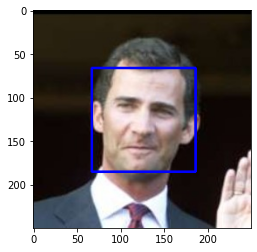

In [10]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# 訓練された顔検出器の抽出
face_cascade = cv2.CascadeClassifier('/content/haarcascades/haarcascade_frontalface_default.xml') #ファイルのパスを指定

# load color (BGR) image
img = cv2.imread(human_files[0])
# BGR画像をグレースケールに変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 画像中の顔を検出
faces = face_cascade.detectMultiScale(gray)

# 画像内で検出された顔の数をprintする
print('Number of faces detected:', len(faces))

# 検出された各顔のバウンディングボックスを取得
for (x,y,w,h) in faces:
    # カラー画像にバウンディングボックスを追加
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# BGR画像をRGBに変換してプロットする
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 画像をバウンディングボックスとともに表示
plt.imshow(cv_rgb)
plt.show()

どの顔検出器を使うにしても，画像をグレースケールに変換するのは標準的な手順です． detectMultiScale`関数は，`face_cascade`に格納された分類器を実行し，パラメータとしてグレースケール画像を受け取ります．  

上記のコードでは，`faces`は検出された顔のnumpy配列で，各行が検出された顔に対応しています． 検出された各顔は，検出された顔のバウンディングボックスを指定する4つのエントリを持つ1次元の配列です。 配列の最初の2つのエントリ（上記のコードでは `x` と `y` として抽出されています）は，バウンディングボックスの左上隅の水平および垂直方向の位置を指定します． 配列の最後の2つのエントリ（ここでは `w` と `h` として抽出）は，ボックスの幅と高さを指定します．

### 人間の顔検出器を書く

この手続きを利用して，画像中に人間の顔が検出された場合には`True`を，そうでない場合には`False`を返す関数を作成することができます． この関数は，適切に命名された `face_detector` と呼ばれるもので，文字列で表された画像のファイルパスを入力とし，以下のコードブロックのようになります．

In [11]:
# img_pathに格納された画像から顔が検出された場合、"True "を返す。
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (実装）人の顔検出機能の評価

__質問1:__ 以下のコードセルを使用して、`face_detector`関数の性能をテストしてください。 
- human_files` の最初の 100 枚の画像のうち，人間の顔が検出されたのは何パーセントでしょうか？ 
- dog_files`に含まれる最初の100枚の画像のうち、人間の顔が検出された割合は？

理想的には、人間の画像で顔が検出される割合が100％、犬の画像で顔が検出される割合が0％であることが望ましいです。 私たちのアルゴリズムは，この目標には達していませんが，それでも十分な性能が得られることがわかります． それぞれのデータセットから最初の100枚の画像のファイルパスを抽出し，numpy配列の `human_files_short` と `dog_files_short` に格納します．

__Answer:__ 
(結果をprintしたり、パーセンテージを書いたりすることができます。)

In [12]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# この行より上のコードは変更しないでください。 #-#-#

## TODO: human_files_shortとdog_files_shortの画像で
##　face_detectorアルゴリズムの性能をテストする

human_count = np.sum([face_detector(i) for i in human_files_short])
dog_count = np.sum([face_detector(i) for i in dog_files_short])

# 顔検出の割合を表示
print('Human faces in human dataset detected : {} %'.format(human_count))
print('Human faces in dog dataset detected : {} %'.format(dog_count))

Human faces in human dataset detected : 100 %
Human faces in dog dataset detected : 45 %


アルゴリズムの中で人間の画像を検出するための潜在的な方法として、OpenCVの顔検出器を提案しますが、他のアプローチ、特に深層学習を利用したアプローチを自由に検討することができます :)。以下のコードセルを使用して、あなた自身の顔検出アルゴリズムを設計し、テストしてください。この任意の課題を追求することに決めた場合、human_files_short と dog_files_short のパフォーマンスを報告してください。

In [13]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: 犬の検出

このセクションでは、[事前に学習したモデル](http://pytorch.org/docs/master/torchvision/models.html)を使って、画像中の犬を検出します。

### 学習済みのVGG-16モデルの取得

以下のコードセルは、VGG-16モデルと、画像分類やその他の視覚タスクに使用される非常に大規模で非常に人気のあるデータセットである[ImageNet](http://www.image-net.org/)で訓練された重みをダウンロードします。 ImageNetには1000万以上のURLが含まれており、それぞれが[1000のカテゴリ]（https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a）の1つのオブジェクトを含む画像にリンクしています。   

In [14]:
import torch
import torchvision.models as models

# VGG16 modelを定義する
VGG16 = models.vgg16(pretrained=True)

# CUDAが利用可能かどうかの確認
use_cuda = torch.cuda.is_available()

# CUDAが利用可能な場合、モデルをGPUに移動
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

事前に学習されたVGG-16モデルは、画像が与えられると、その画像に含まれるオブジェクトの予測値（ImageNetの1000の可能なカテゴリから得られる）を返します。

### (実装) 学習済みモデルで予測を行う

次のコードセルでは、画像へのパス（`'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`など）を入力として受け取り、事前に学習されたVGG-16モデルによって予測されるImageNetクラスに対応するインデックスを返す関数を書きます。 出力は、常に0から999までの整数でなければなりません。

In [15]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    事前に学習されたVGG-16モデルを用いて、指定されたパスにある画像のImageNetクラスの予測値に対応するインデックスを取得します。
    予測されるImageNetクラスに対応するインデックスを取得します。
    
    引数は
        img_path: 画像へのパス
        
    戻り値
        VGG-16モデルの予測値に対応するインデックス
    '''
    
    ## TODO: 関数を完成させる.
    ## 与えられたimg_pathから画像を読み込み、前処理を行う
    ## その画像に対応する予測クラスの*index*を返します。
    
    #jpgを読み込む
    img = Image.open(img_path)

    #imgをtensorに変換し、VGG16の入力とする
    toTensor = transforms.ToTensor()

    #人の顔のjpgファイルの幅は250
    #犬のjpgファイルのサイズは様々で、250にリサイズ/クロップされる
    transform_pipeline = transforms.Compose([transforms.RandomResizedCrop(250), transforms.ToTensor()])

    img_tensor = transform_pipeline(img)
    img_tensor = img_tensor.unsqueeze(0)

    # move tensor to cuda
    if torch.cuda.is_available():
        img_tensor = img_tensor.cuda()

    prediction = VGG16(img_tensor)
    
    # move tensor to cpu, for cpu processing
    if torch.cuda.is_available():
        prediction = prediction.cpu()

    index = prediction.data.numpy().argmax()

    return index # 予測される class index

### (実装) 犬の検出器を書く

[辞書](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)を見ると、犬に対応するカテゴリが途切れることなく並んでいて、辞書のキー151〜268に対応しており、`'チワワ'`から`'メキシカンヘアレス'`までのすべてのカテゴリが含まれていることがわかります。 このように、学習済みのVGG-16モデルによって画像に犬が含まれていると予測されているかどうかを確認するには、学習済みのモデルが151～268（含む）のインデックスを予測しているかどうかを確認すればよいのです。

これらのアイデアを使って、以下の `dog_detector` 関数を完成させてください。この関数は、画像中に犬が検出された場合は `True` を、検出されなかった場合は `False` を返します。

In [16]:
### img_pathに格納された画像に犬が検出された場合、"True "を返します。
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)

    return (151 <= index and index<=268) # true/false

### (実装) 犬の検出器を評価する

__質問2:__ 以下のコードセルを使って、`dog_detector`関数の性能をテストしてみてください。 
- human_files_short`にある画像のうち、犬が検出された割合は？ 
- dog_files_short` にある画像のうち、犬が検出された画像の割合は？

__Answer:__ 


In [17]:
## TODO: human_files_shortとdog_files_shortの画像で
##　dog_detectorアルゴリズムの性能をテストする

human_files_detected_as_human = np.average(([dog_detector(i) for i in human_files_short]) * 100)
dog_files_detected_as_human = np.average(([face_detector(i) for i in dog_files_short]) * 100)

# 顔検出の割合を表示
print('Percentage of first 100 images where humans detected as a dog : {} %'.format(human_files_detected_as_human))
print('Percentage of first 100 images where dogs detected as a dog : {} %'.format(dog_files_detected_as_human))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Percentage of first 100 images where humans detected as a dog : 0.01 %
Percentage of first 100 images where dogs detected as a dog : 0.45 %


犬の画像を検出するネットワークとして、VGG-16を提案しますが、他の事前学習済みのネットワーク（[Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3)、[ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3)など）も自由に試してみてください。 他のPyTorchモデルのテストには、以下のコードセルをご利用ください。 もしこの_optional_タスクを実行することに決めたら、`human_files_short`と`dog_files_short`のパフォーマンスを報告してください。

In [18]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: 犬種を分類するCNNを作る(from Scratch)

画像から人間と犬を検出する機能ができたので、今度は画像から犬種を予測する方法が必要です。 このステップでは、犬種を分類するCNNを作ります。 CNNはゼロから作らなければならず（つまり伝達学習はまだ使えません！）、テストの精度は最低でも10％以上にしなければなりません。 このノートブックのステップ4では、伝達学習を使って精度が大幅に向上したCNNを作る機会があります。

画像から犬種を割り出す作業は、非常に難しいと言われています。 その理由は、ブリタニーとウェルシュ・スプリンガー・スパニエルを区別することは、人間でさえ難しいと考えられているからです。 

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

クラス間の変動が少ない犬種ペアを見つけることは難しくありません（例えば、Curly-Coated RetrieversとAmerican Water Spanielsなど） 

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


同様に、ラブラドールにはイエロー、チョコレート、ブラックがあることを思い出してください。 ビジョンベースのアルゴリズムは、このクラス内変動の大きさを克服して、これらの異なる色調をすべて同じ品種として分類する方法を決定しなければなりません。

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

また、ランダム・チャンスのハードルが非常に低いことにも言及しておきます。クラスのバランスが若干悪いことはさておき、ランダムに推測した場合、正解になるのはおよそ133分の1で、これは1％未満の精度に相当します。

深層学習では、理論よりも実践の方がはるかに重要であることを忘れてはいけません。 様々なアーキテクチャを試し、自分の直感を信じてください。 そして、もちろん、楽しんでください。

### (実装) Dog データセットのデータローダの指定

以下のコードセルを使って，犬の画像のトレーニングデータセット，検証データセット，テストデータセット（それぞれ`dogImages/train`，`dogImages/valid`，`dogImages/test`にある）用の3つの個別の[データローダ](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)を書いてください． カスタムデータセットについてのドキュメント](http://pytorch.org/docs/stable/torchvision/datasets.html)も参考になるでしょう。 トレーニングデータや検証データを増やすことに興味がある場合は、さまざまな[transform](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)をチェックしてみてください。

In [19]:
import os
from torchvision import datasets

### TODO: トレーニングセット、バリデーションセット、テストセット用のデータローダを書く
## 適切なトランスフォームとバッチサイズの指定

transform_pipeline = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

train_data = datasets.ImageFolder('/content/dogImages/train', transform=transform_pipeline)
valid_data = datasets.ImageFolder('/content/dogImages/valid', transform=transform_pipeline)
test_data = datasets.ImageFolder('/content/dogImages/test', transform=transform_pipeline)

batch_size = 10
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}


**Question 3:** あなたが選んだデータの前処理方法を説明してください。
- あなたのコードはどのように画像のサイズを変更しますか（切り取り、引き伸ばしなど）？ 入力テンソルにどのようなサイズを選んだのか、またその理由は？

- データセットを増強することにしましたか？ もしそうなら、どのようにして（トランスレーション、フリップ、ローテーションなどによって）？ しない場合は、なぜしないのですか？


**Answer**:
・RandomResizedCropを使用して、224にサイズを指定した。
・一般的な方法だと思った。
・データに偏りが出ると良くないので、データを増やしませんでした。

### (実装) モデルのアーキテクチャ

犬の品種を分類するCNNを作成します。 以下のコードセルにテンプレートを使用します。

In [20]:
import torch.nn as nn
import torch.nn.functional as F

total_dog_classes = 133 # 犬の全クラス

# define the CNN architecture
class Net(nn.Module):
    ### TODO: アーキテクチャを選択し、クラスを完成させる
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride = 2, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride = 2, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        

        #pooling層
        self.pool = nn.MaxPool2d(2, 2)

        size_linear_layer = 500

        #linear layer (128 * 28 * 28 -> 500)
        self.fc1 = nn.Linear(7 * 7 * 128, size_linear_layer)
        self.fc2 = nn.Linear(size_linear_layer, total_dog_classes)

        #Dropout
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = x.view(-1, 7 * 7 * 128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# この行以下のコードを修正する必要はありません。 #-#-#

# CNNをインスタンス化する
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

### (実装) 損失関数とオプティマイザの指定

次のコードセルを使って、[損失関数](http://pytorch.org/docs/stable/nn.html#loss-functions)と[オプティマイザ](http://pytorch.org/docs/stable/optim.html)を指定します。 選択した損失関数を`criterion_scratch`、オプティマイザを`optimizer_scratch`として、以下に保存します。

In [21]:
import torch.optim as optim

### TODO: 損失関数の設定
criterion_scratch = nn.CrossEntropyLoss()

### TODO: optimizerの設定
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.01)

if use_cuda:
  criterion_scratch = criterion_scratch.cuda()

### (実装) モデルのトレーニングと検証

以下のコードセルでモデルのトレーニングと検証を行います。 最終的なモデルのパラメータ](http://pytorch.org/docs/master/notes/serialization.html)
をファイルパス`'model_scratch.pt'に保存します。


In [22]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                #cuda0 = torch.device('cuda:0')  # CUDA GPU 0
                #data = data.to(cuda0)
                #target = target.to(cuda0)
                data, target = data.cuda(), target.cuda()
            ## 損失を見つけ、それに応じてモデルのパラメータを更新する
            ## 以下のような方法で、トレーニングの平均損失を記録する
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            # forward pass: モデルに入力を渡して予測出力を計算する
            output = model(data)
            # バッチ損失の計算
            loss = criterion(output, target)
            # backward pass: モデル・パラメータに対する損失の勾配を計算する
            loss.backward()
            # 単一の最適化ステップ（パラメータの更新）を行う
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #if batch_idx % 100 == 0:
            #    print('Epoch %d, Batch %d loss: %.6f' % (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: validation loss が減少したらモデルを保存
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'
                  .format(valid_loss_min, valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# 検証精度が最も高かったモデルをロードする
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.950055 	Validation Loss: 4.869231
Validation loss decreased (inf --> 4.869231).  Saving model ...
Epoch: 2 	Training Loss: 4.876235 	Validation Loss: 4.870101
Epoch: 3 	Training Loss: 4.876046 	Validation Loss: 4.871282
Epoch: 4 	Training Loss: 4.875693 	Validation Loss: 4.870361
Epoch: 5 	Training Loss: 4.875122 	Validation Loss: 4.869680
Epoch: 6 	Training Loss: 4.875995 	Validation Loss: 4.870676
Epoch: 7 	Training Loss: 4.875936 	Validation Loss: 4.870553
Epoch: 8 	Training Loss: 4.876205 	Validation Loss: 4.871595
Epoch: 9 	Training Loss: 4.875468 	Validation Loss: 4.870720
Epoch: 10 	Training Loss: 4.876238 	Validation Loss: 4.870122
Epoch: 11 	Training Loss: 4.875845 	Validation Loss: 4.870193
Epoch: 12 	Training Loss: 4.876081 	Validation Loss: 4.871000
Epoch: 13 	Training Loss: 4.875580 	Validation Loss: 4.870833
Epoch: 14 	Training Loss: 4.876676 	Validation Loss: 4.871738
Epoch: 15 	Training Loss: 4.875884 	Validation Loss: 4.872283
Epoch: 16 	Trai

<All keys matched successfully>

### (実装) モデルのテスト

犬の画像のテストデータセットで、あなたのモデルを試してみてください。 以下のコードセルを使って、テストの損失と精度を計算し、印刷してください。 テストの精度が10%以上であることを確認してください。

In [23]:
def test(loaders, model, criterion, use_cuda):

    # モニターテストの損失と精度
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: モデルに入力を渡して予測出力を計算する
        output = model(data)
        # lossの計算
        loss = criterion(output, target)
        # 平均テストlossの更新
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # 出力された確率を予測されたクラスに変換する
        pred = output.data.max(1, keepdim=True)[1]
        # 予測値と真のラベルの比較
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# 呼び出しテスト機能  
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.857729


Test Accuracy:  1% (10/836)


---
<a id='step4'></a>
## Step 4: 犬種を分類するCNNを作る（Transfer Learningの利用)

これから伝達学習を使って、画像から犬種を識別するCNNを作成します。 作成したCNNはテストセットで60%以上の精度を達成しなければなりません。

### (実装) Dogデータセットのデータローダを指定する

以下のコードセルを使って、犬の画像のトレーニングデータセット、検証データセット、テストデータセット（それぞれ`dogImages/train`、`dogImages/valid`、`dogImages/test`にあります）用の3つの別々の[データローダ](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)を書きます。

もしよろしければ、**前のステップ**でCNNをゼロから作ったときと同じデータローダーを使ってもかまいません。

In [24]:
## TODO: データローダの指定
loaders_transfer = loaders_scratch.copy()

### (実装) モデルのアーキテクチャ

伝達学習を利用して、犬種を分類するCNNを作成します。 以下のコードセルを使用して、初期化されたモデルを変数 `model_transfer` として保存してください。

In [25]:
import torchvision.models as models
import torch.nn as nn

## TODO: モデルアーキテクチャの指定 
model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(2048, 133, bias=True)

fc_parameters = model_transfer.fc.parameters()

for param in fc_parameters:
    param.requires_grad = True


if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

### (実装) 損失関数とoptimizerの指定

次のコードセルを使って、[損失関数](http://pytorch.org/docs/master/nn.html#loss-functions)と[optimizer](http://pytorch.org/docs/master/optim.html)を指定します。 選択した損失関数を `criterion_transfer` 、optimizerを `optimizer_transfer` として以下に保存します。

In [26]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_scratch.parameters(), lr=0.01)

### (実装) モデルのトレーニングと検証

以下のコードセルでモデルのトレーニングと検証を行います。 最終的なモデルのパラメータ](http://pytorch.org/docs/master/notes/serialization.html)をファイルパス`'model_transfer.pt'に保存します。

In [27]:
n_epochs = 20

# train the model
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.926771 	Validation Loss: 4.934860
Validation loss decreased (inf --> 4.934860).  Saving model ...
Epoch: 2 	Training Loss: 4.930243 	Validation Loss: 4.934441
Validation loss decreased (4.934860 --> 4.934441).  Saving model ...
Epoch: 3 	Training Loss: 4.927515 	Validation Loss: 4.945900
Epoch: 4 	Training Loss: 4.927499 	Validation Loss: 4.935113
Epoch: 5 	Training Loss: 4.929569 	Validation Loss: 4.932478
Validation loss decreased (4.934441 --> 4.932478).  Saving model ...
Epoch: 6 	Training Loss: 4.929121 	Validation Loss: 4.938535
Epoch: 7 	Training Loss: 4.931090 	Validation Loss: 4.931170
Validation loss decreased (4.932478 --> 4.931170).  Saving model ...
Epoch: 8 	Training Loss: 4.928861 	Validation Loss: 4.926240
Validation loss decreased (4.931170 --> 4.926240).  Saving model ...
Epoch: 9 	Training Loss: 4.926317 	Validation Loss: 4.932169
Epoch: 10 	Training Loss: 4.928312 	Validation Loss: 4.930368
Epoch: 11 	Training Loss: 4.927579 	Validation Lo

<All keys matched successfully>

### (実装) モデルのテスト

犬の画像のテストデータセットで、モデルを試してみましょう。以下のコードセルを使って、テストの損失と精度を計算し、印刷します。 テストの精度が60%以上であることを確認してください。

In [28]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 4.923632


Test Accuracy:  1% (10/836)


### (実装）モデルで犬種を予測する

画像のパスを入力とし、モデルによって予測された犬種（`Affenpinscher`、`Afghan hound`など）を返す関数を書きましょう。     

In [29]:
### TODO: 画像へのパスを入力とする関数を書く
### モデルによって予測された犬種を返します。

# クラス名のインデックスによるリスト、つまりclass_names[0]のように名前にアクセスできる
class_names = [item[4:].replace("_", " ") for item in train_loader.dataset.classes]
def load_image(img_path):
    # Pre-process
    transform = transforms.Compose([transforms.RandomResizedCrop(224), trandforms.ToTensor()])
    
    # 画像を開き、変換処理を施す
    img = Image.open(img_path)
    img = transform(img)
    img = img.unsqueeze(0)
    
    return img

def predict_breed_transfer(img_path):
    # 画像を読み込んで、予測された品種を返す
    img = load_image(img_path)
    
    if use_cuda:
        img = img.cuda()
        model = model.cuda()
        
    # 前処理された画像をモデルへの入力として渡し、予測を行う
    model.eval()
    prediction = model(img)
    
    # 最も確率の高いクラスインデックスを取得
    index = torch.max(prediction,1)[1].item() # 予測されるクラスインデックス
    
    return class_names[index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

画像のファイルパスを受け取り、まずその画像に人間が写っているのか、犬が写っているのか、あるいはどちらでもないのかを判断するアルゴリズムを書いてください。 そして
- 犬が写っていた場合、予測される犬種を返す。
- 人が写っていたら、似ている犬種を返す。
- どちらでもないが画像に検出された場合は、エラーを示す出力を提供します。

画像から人間や犬を検出するための独自の関数を書くことは自由ですが，上記で開発された `face_detector` および `dog_detector` 関数を自由に使ってください． ステップ4のCNNを使って犬の品種を予測することは必須です。 

私たちのアルゴリズムのサンプル出力を以下に示しますが、あなた自身のユーザーエクスペリエンスを自由にデザインしてください。


![Sample Human Output](images/sample_human_output.png)


### (実装）アルゴリズムの作成

In [30]:
### TODO: アルゴリズムの作成
### 必要な数のコードセルを自由にお使いください。

def run_app(img_path):
    ## 人の顔、犬の顔、どちらでもないケースを扱う
    img = Image.open(img_path)
    plt.imshow(img)
    
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(img_path, model_transfer, class_names)
        print("\n\nHello, Dog!")
        plt.show()
        print("You look like a ...\n{0}".format(prediction))
        
    elif face_detector(img_path) is True:
        prediction = predict_breed_transfer(img_path, model_transfer, class_names)
        print("\n\nHello, Human!")
        plt.show()
        print("You look like a ...\n{0}".format(prediction))
    else:
        print("\n\nError! No Dog or Human detected!")
    


---
<a id='step6'></a>
## Step 6: アルゴリズムのテスト

このセクションでは、新しいアルゴリズムを試してみましょう。 アルゴリズムは、あなたがどんな犬に似ていると思いますか？ あなたが犬を飼っている場合、アルゴリズムは犬の品種を正確に予測しますか？ 猫を飼っている場合、猫を犬だと勘違いしていませんか？

### (実装) サンプル画像でアルゴリズムをテストしよう!

最低6枚の画像を使って、アルゴリズムをテストしてみましょう。 気に入った画像があれば自由に使ってください。 人間と犬の画像を2枚以上使ってください。

In [31]:
## TODO: ステップ6からのアルゴリズムを実行します。
## 少なくとも6枚の画像で実行してください。
## 必要な数のコードセルを自由にお使いください。

human_files = ['./test_image/23.jpg','./test_image/191_n.jpg','./test_image/IMG-20180930-WA0001.jpg','./test_image/IMG_20180930_175657886.jpg']
dog_files = ['./test_image/dog1.jpg','./test_image/dog2.jpg','./test_image/dog3.jpg']
## 提案されたコードは以下の通りです。
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

FileNotFoundError: ignored